## Ejercicio Práctico - Clase 2 VPC2 - 4co2021

Generar una red convolucional con las siguientes caracteristicas:

*   Conv1: cantidad de filtros=16, tramaño de filtro=3, stride=1, padding="same"
*   Pool1: MaxPooling, tamaño de filtro=2, stride=2
*   Conv2: cantidad de filtros=32, tramaño de filtro=3, stride=1, padding="same"
*   Pool2: MaxPooling, tamaño de filtro=2, stride=2
*   Conv3: cantidad de filtros=64, tramaño de filtro=3, stride=1, padding="same"
*   Pool3: MaxPooling, tamaño de filtro=2, stride=2
*   Conv4: cantidad de filtros=128, tramaño de filtro=3, stride=1, padding="same"
*   Linear1: cantidad de neuronas=100
*   Linear2: capa de salida

Elegir la función de activación que crean mas conveniente.

Ejercicios:

1.   Utilizando el dataset CIFAR10, provisto por PyTorch, entrenar la red sin aplicar data augmentation durante, al menos, 20 epocas. Se produce sobreentrenamiento?
2.   Utilizando el mismo dataset y aplicando las tecnicas de data augmentation que considere necesarias, entrenar nuevamente la red durante, al menos, 20 epocas sin que se produzca sobreentrenamiento hasta alcanzar un accuracy de 80% aproximadamente.
3.   A partir de los resultados obtenidos en los puntos anteriores: ¿Por qué cree que en el segundo caso el ritmo de mejora de la red es mas lento que en el primero?

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import numpy as np

In [2]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

training_loader = torch.utils.data.DataLoader(training_data, batch_size=10, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
print("test data:",len(test_data),"\ntrain data:", len(training_data))

test data: 10000 
train data: 50000


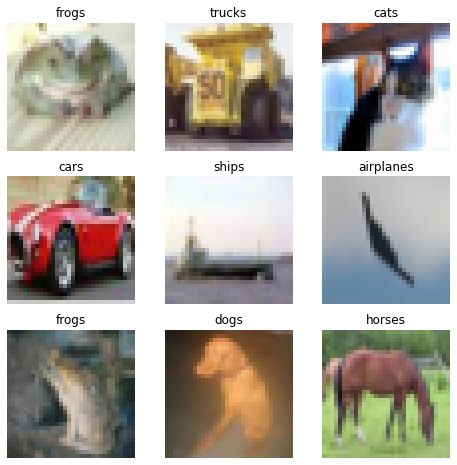

In [4]:
labels_map = {
    0: "airplanes",
    1: "cars",
    2: "birds",
    3: "cats",
    4: "deer",
    5: "dogs",
    6: "frogs",
    7: "horses",
    8: "ships",
    9: "trucks",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

In [5]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()# super(GarmentClassifier, self).__init__()
        self.conv1=torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,stride=1,padding="same")
        self.pool1=torch.nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,stride=1,padding="same")
        self.pool2=torch.nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv3=torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,stride=1,padding="same")
        self.pool3=torch.nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv4=torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,stride=1,padding="same")
        self.fc1 = torch.nn.Linear(in_features=128*4*4, out_features=100)
        self.fc2 = torch.nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = torch.relu(self.conv4(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Model()

In [6]:
# import torch.nn as nn
# import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# model = Net()

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(training_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.300
[1,  4000] loss: 2.085
[2,  2000] loss: 1.789
[2,  4000] loss: 1.640
[3,  2000] loss: 1.462
[3,  4000] loss: 1.368
[4,  2000] loss: 1.244
[4,  4000] loss: 1.181
[5,  2000] loss: 1.078
[5,  4000] loss: 1.032
[6,  2000] loss: 0.935
[6,  4000] loss: 0.907
[7,  2000] loss: 0.828
[7,  4000] loss: 0.815
[8,  2000] loss: 0.736
[8,  4000] loss: 0.736
[9,  2000] loss: 0.658
[9,  4000] loss: 0.677
[10,  2000] loss: 0.590
[10,  4000] loss: 0.608
[11,  2000] loss: 0.517
[11,  4000] loss: 0.546
[12,  2000] loss: 0.447
[12,  4000] loss: 0.494
[13,  2000] loss: 0.408
[13,  4000] loss: 0.435
[14,  2000] loss: 0.345
[14,  4000] loss: 0.375
[15,  2000] loss: 0.295
[15,  4000] loss: 0.344
[16,  2000] loss: 0.249
[16,  4000] loss: 0.288
[17,  2000] loss: 0.203
[17,  4000] loss: 0.264
[18,  2000] loss: 0.180
[18,  4000] loss: 0.232
[19,  2000] loss: 0.159
[19,  4000] loss: 0.205
[20,  2000] loss: 0.152
[20,  4000] loss: 0.193
[21,  2000] loss: 0.128
[21,  4000] loss: 0.163
[22,  2000

In [10]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


# Aplicando data augmentation

In [18]:
aud_data_transforms = torchvision.transforms.Compose([
                        torchvision.transforms.RandomHorizontalFlip(0.5),
                        torchvision.transforms.ColorJitter(saturation=0.05, hue=0.05),
                        torchvision.transforms.ToTensor(),
                      ])

training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=aud_data_transforms
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=aud_data_transforms#ToTensor()
)

training_loader = torch.utils.data.DataLoader(training_data, batch_size=10, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=None, contrast=None, saturation=[0.95, 1.05], hue=[-0.05, 0.05])
               ToTensor()
           )

In [16]:
new_model = Model()
optimizer = torch.optim.SGD(new_model.parameters(), lr=0.01)
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(training_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = new_model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.249
[2,  2000] loss: 1.899
[2,  4000] loss: 1.678
[3,  2000] loss: 1.505
[3,  4000] loss: 1.439
[4,  2000] loss: 1.320
[4,  4000] loss: 1.260
[5,  2000] loss: 1.164
[5,  4000] loss: 1.136
[6,  2000] loss: 1.040
[6,  4000] loss: 1.024
[7,  2000] loss: 0.952
[7,  4000] loss: 0.948
[8,  2000] loss: 0.879
[8,  4000] loss: 0.865
[9,  2000] loss: 0.807
[9,  4000] loss: 0.810
[10,  2000] loss: 0.759
[10,  4000] loss: 0.757
[11,  2000] loss: 0.712
[11,  4000] loss: 0.707
[12,  2000] loss: 0.663
[12,  4000] loss: 0.682
[13,  2000] loss: 0.625
[13,  4000] loss: 0.633
[14,  2000] loss: 0.582
[14,  4000] loss: 0.609
[15,  2000] loss: 0.554
[15,  4000] loss: 0.572
[16,  2000] loss: 0.532
[16,  4000] loss: 0.543
[17,  2000] loss: 0.489
[17,  4000] loss: 0.511
[18,  2000] loss: 0.466
[18,  4000] loss: 0.486
[19,  2000] loss: 0.434
[19,  4000] loss: 0.464
[20,  2000] loss: 0.412
[20,  4000] loss: 0.441
[21,  2000] loss: 0.394
[21,  4000] loss: 0.414
[22,  2000

In [19]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = new_model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 73 %


El ritmo de entrenamiento del modelo que tiene el data augmentation es mas lento dado que debe tratar con datos alterados, agregando información que debe manejar. Esta mayor contingencia ralentiza el entrenamiento de este modelo.